In [1]:
import polars as pl
import polars.selectors as cs
from plotnine import *
import yfinance as yf

## Data Retrieval

In [2]:
sp500_ticker = "^SPX"  # S&P 500 index
df_raw = yf.download(sp500_ticker, period="5y") 

<positron-console-cell-2>:2: FutureWarning: YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

In [3]:
df_raw.head()

Price,Close,High,Low,Open,Volume
Ticker,^SPX,^SPX,^SPX,^SPX,^SPX
Date,,,,,
2020-07-20,3251.840088,3258.610107,3215.159912,3224.290039,3979340000
2020-07-21,3257.300049,3277.290039,3247.770020,3268.520020,4556610000
2020-07-22,3276.020020,3279.320068,3253.100098,3254.860107,4267160000
2020-07-23,3235.659912,3279.989990,3222.659912,3271.639893,4296760000
2020-07-24,3215.629883,3227.260010,3200.050049,3218.580078,3689410000


## Data Cleanup

In [4]:
df_raw.reset_index().columns

MultiIndex([(  'Date',     ''),
            ( 'Close', '^SPX'),
            (  'High', '^SPX'),
            (   'Low', '^SPX'),
            (  'Open', '^SPX'),
            ('Volume', '^SPX')],
           names=['Price', 'Ticker'])

In [5]:
col_names = [c[0].strip() for c in df_raw.reset_index().columns]
col_names

['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

In [6]:
df_stg = df_raw.reset_index()
df_stg.columns = col_names
df = pl.from_pandas(df_stg).with_columns(pl.col('Date').cast(pl.Date))
df.glimpse()

Rows: 1256
Columns: 6
$ Date   <date> 2020-07-20, 2020-07-21, 2020-07-22, 2020-07-23, 2020-07-24, 2020-07-27, 2020-07-28, 2020-07-29, 2020-07-30, 2020-07-31
$ Close   <f64> 3251.840087890625, 3257.300048828125, 3276.02001953125, 3235.659912109375, 3215.6298828125, 3239.409912109375, 3218.43994140625, 3258.43994140625, 3246.219970703125, 3271.1201171875
$ High    <f64> 3258.610107421875, 3277.2900390625, 3279.320068359375, 3279.989990234375, 3227.260009765625, 3241.429931640625, 3243.719970703125, 3264.739990234375, 3250.919921875, 3272.169921875
$ Low     <f64> 3215.159912109375, 3247.77001953125, 3253.10009765625, 3222.659912109375, 3200.050048828125, 3214.25, 3216.169921875, 3227.219970703125, 3204.1298828125, 3220.260009765625
$ Open    <f64> 3224.2900390625, 3268.52001953125, 3254.860107421875, 3271.639892578125, 3218.580078125, 3219.840087890625, 3234.27001953125, 3227.219970703125, 3231.760009765625, 3270.449951171875
$ Volume  <i64> 3979340000, 4556610000, 4267160000, 4296760000

In [7]:
df.describe()

statistic,Date,Close,High,Low,Open,Volume
str,str,f64,f64,f64,f64,f64
"""count""","""1256""",1256.0,1256.0,1256.0,1256.0,1256.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""","""2023-01-15 07:59:14.140000""",4567.467071,4592.55493,4538.732609,4566.271969,4.3430e9
"""std""",null,773.819446,774.400448,772.146292,773.570268,9.5306e8
"""min""","""2020-07-20""",3215.629883,3227.26001,3200.050049,3218.580078,0.0
"""25%""","""2021-10-15""",3986.159912,4015.370117,3953.439941,3984.600098,3.7752e9
"""50%""","""2023-01-17""",4393.660156,4416.779785,4367.189941,4390.629883,4.1553e9
"""75%""","""2024-04-16""",5160.640137,5191.950195,5127.180176,5167.879883,4.7063e9
"""max""","""2025-07-18""",6297.359863,6315.609863,6285.27002,6312.950195,9.9765e9


In [8]:
# validation checks: is the 'Open' value inclusive in the high/low?
df.filter( pl.col('Open') > pl.col('High') ).shape[0] == 0
df.filter( pl.col('Open') < pl.col('Low')).shape[0] == 0

True

## Wrangle

Just adding some columns...

In [39]:
df_pct = (
df
.with_columns(
    year = pl.col('Date').dt.year().cast(pl.String),
    dow = pl.col('Date').dt.weekday(),
    pct_abv_open_intraday = pl.col('High')/pl.col('Open') - 1,
    pct_blw_open_intraday = 1 - pl.col('Low')/pl.col('Open'),
    pct_chg_abs_intraday = (pl.col('High') - pl.col('Low')) / pl.col('Open'),
    pct_chg_daily = pl.col('Close')/pl.col('Open') - 1
)
.with_columns( pct_chg_daily_lag = pl.col('pct_chg_daily').shift(1).sort_by('Date'))
.with_columns( cs.starts_with('pct_').round(3) )
)

df_pct.glimpse()

Rows: 1256
Columns: 13
$ Date                  <date> 2020-07-20, 2020-07-21, 2020-07-22, 2020-07-23, 2020-07-24, 2020-07-27, 2020-07-28, 2020-07-29, 2020-07-30, 2020-07-31
$ Close                  <f64> 3251.840087890625, 3257.300048828125, 3276.02001953125, 3235.659912109375, 3215.6298828125, 3239.409912109375, 3218.43994140625, 3258.43994140625, 3246.219970703125, 3271.1201171875
$ High                   <f64> 3258.610107421875, 3277.2900390625, 3279.320068359375, 3279.989990234375, 3227.260009765625, 3241.429931640625, 3243.719970703125, 3264.739990234375, 3250.919921875, 3272.169921875
$ Low                    <f64> 3215.159912109375, 3247.77001953125, 3253.10009765625, 3222.659912109375, 3200.050048828125, 3214.25, 3216.169921875, 3227.219970703125, 3204.1298828125, 3220.260009765625
$ Open                   <f64> 3224.2900390625, 3268.52001953125, 3254.860107421875, 3271.639892578125, 3218.580078125, 3219.840087890625, 3234.27001953125, 3227.219970703125, 3231.760009765625, 3270

## Plots

Some of the first plots you make are pretty ugly while you are trying to decide what you want to do...

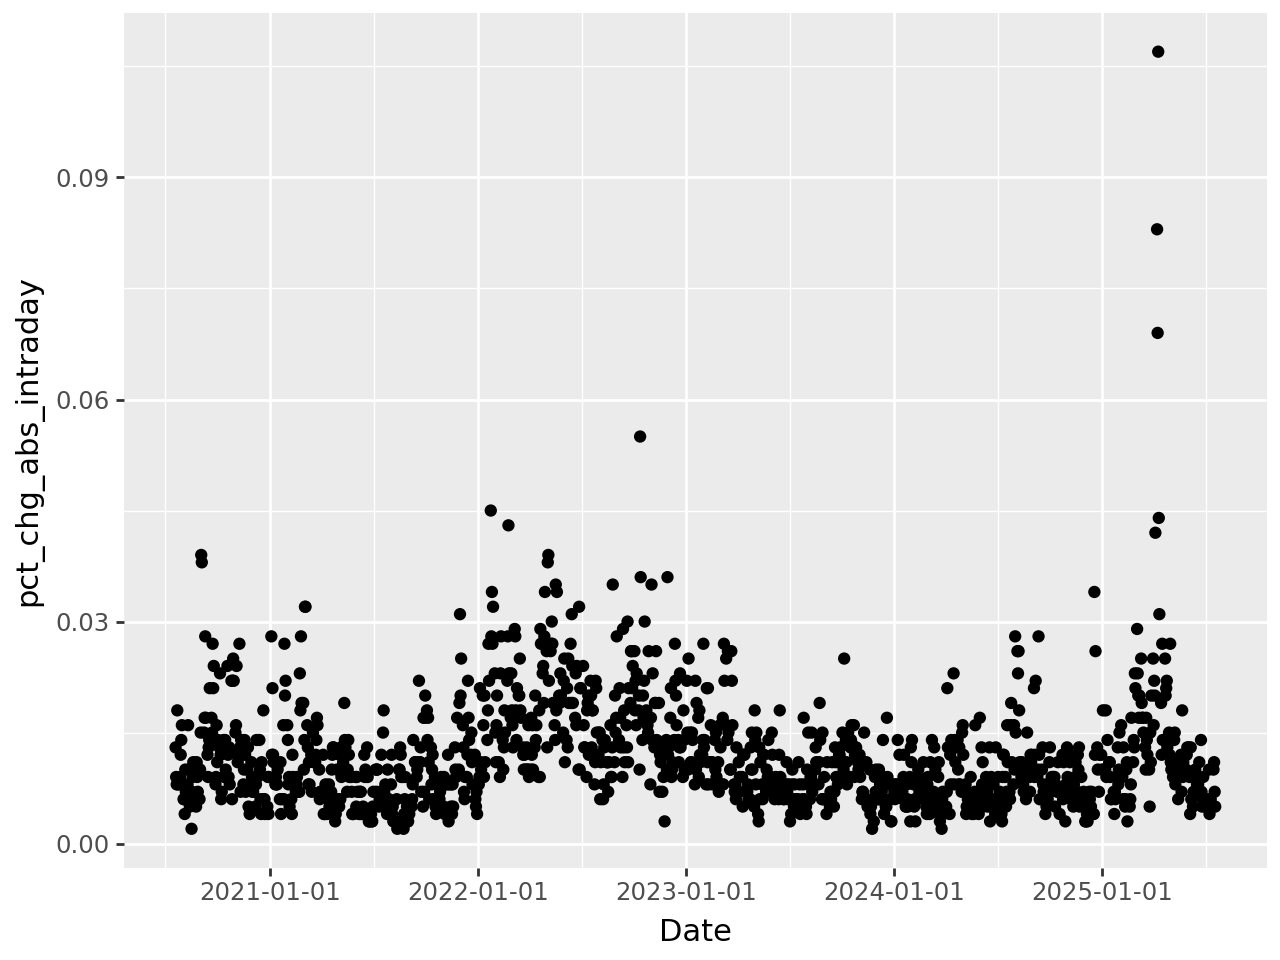

In [27]:
(
ggplot(df_pct) +
aes(x = 'Date', y = 'pct_chg_abs_intraday') +
geom_point()
)

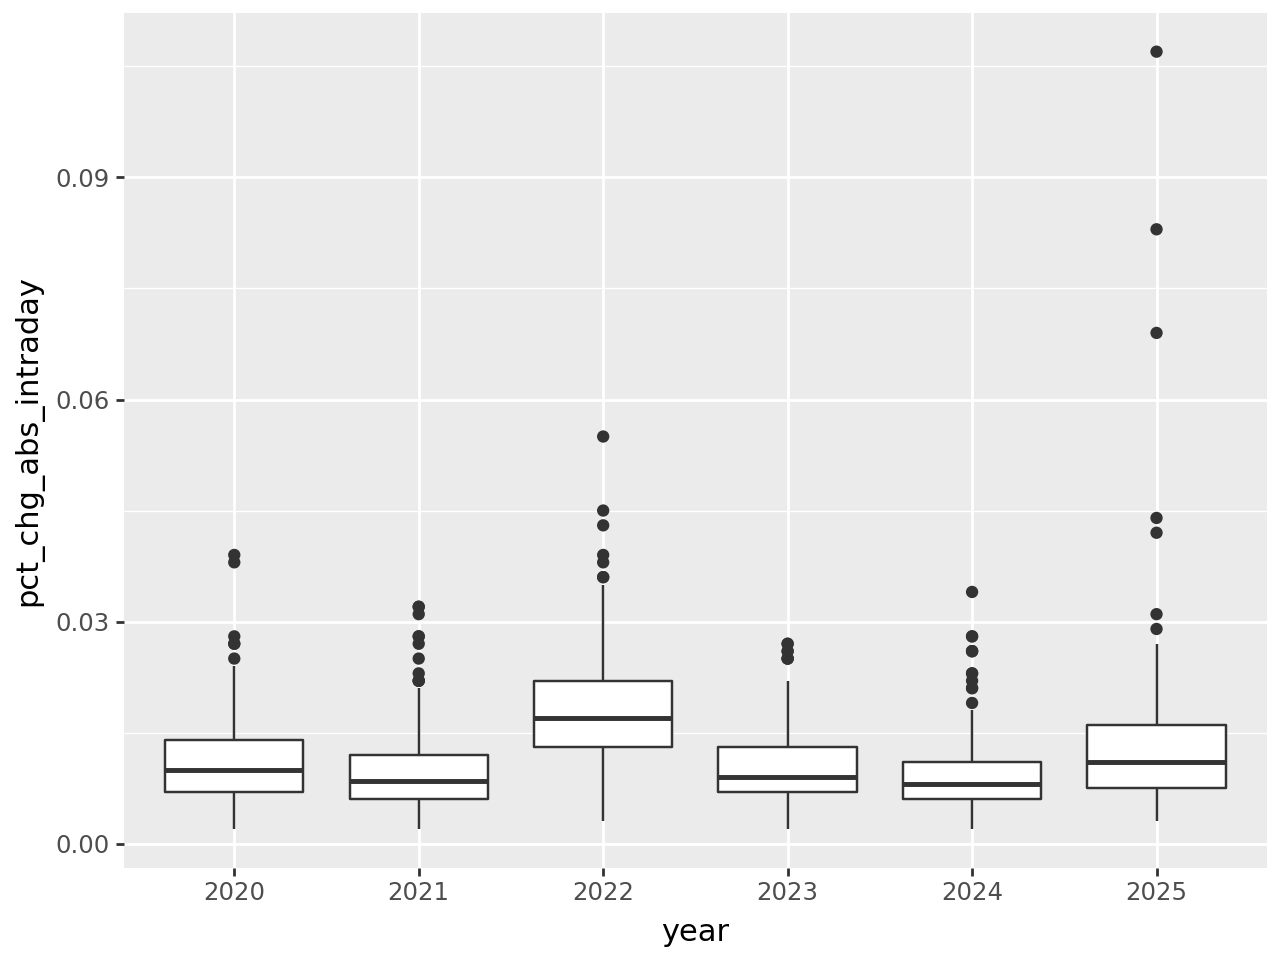

In [40]:
(
ggplot(df_pct) +
aes(x = 'year', y = 'pct_chg_abs_intraday') +
geom_boxplot()
)

c:\Users\emily\Desktop\website\post\quarto-comms\.venv\Lib\site-packages\plotnine\layer.py:372: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


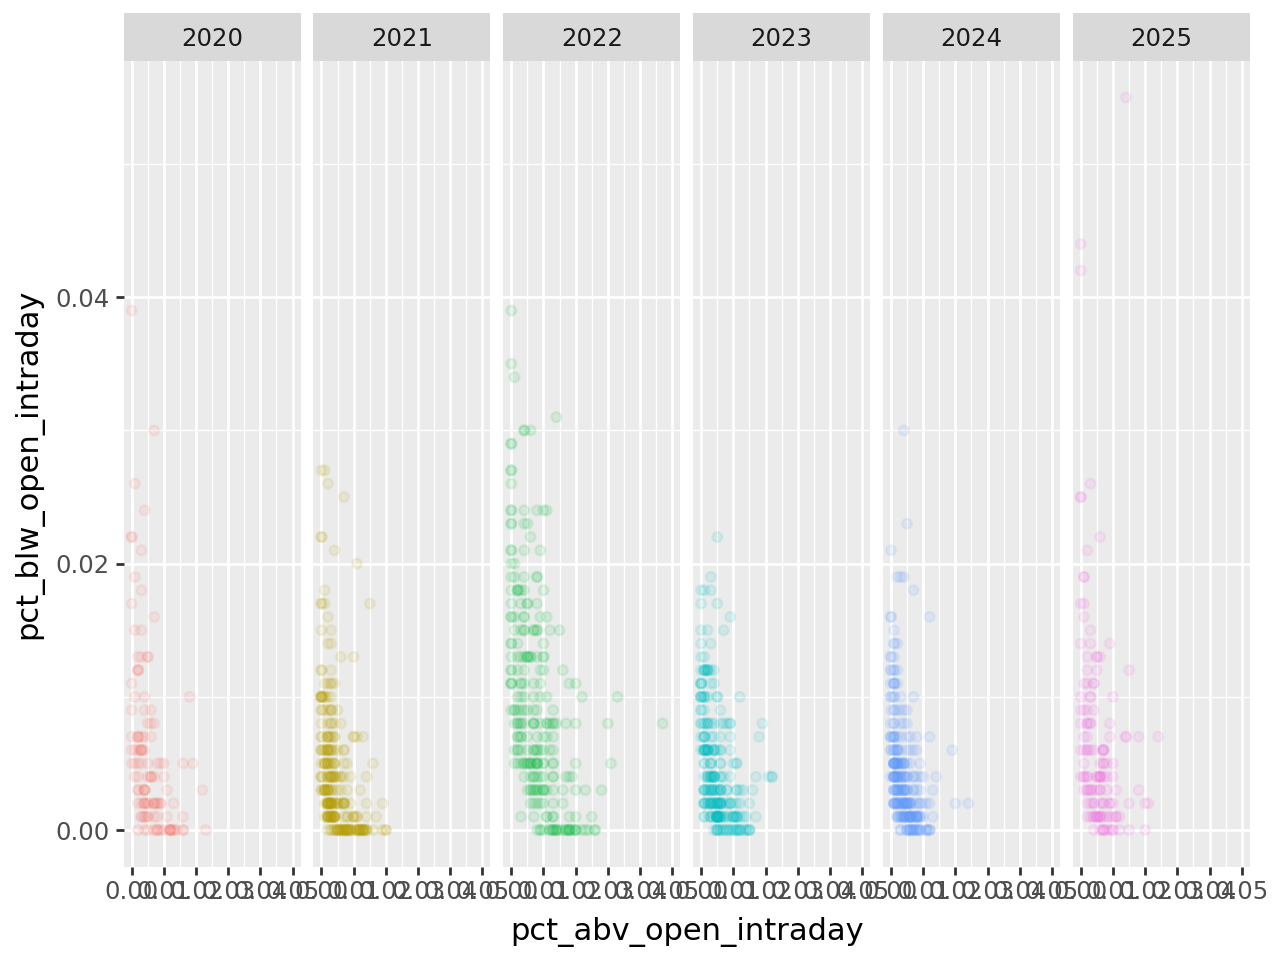

In [37]:
(
ggplot(df_pct) +
aes(x = 'pct_abv_open_intraday', y = 'pct_blw_open_intraday', color = 'year') +
geom_point(alpha = 0.1) +
facet_grid(cols = 'year') +
theme(legend_position = 'none') +
scale_x_continuous(limits = [0,0.05])
)